In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [10]:
### LOAD DATA  

df = pd.read_csv('/Users/macbook/Desktop/coffee_shop_revenue.csv')
print(df.head())

   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39 

In [1]:
### DATA PROCESSING 

##define variables  
X = df.drop(columns=['Daily_Revenue'])  # All independent variables
y = df['Daily_Revenue']  # Target variable

##Standardisation
scaler = StandardScaler()  # Initialize the scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform the dataset

##Split the Data into Training and Testing Sets
#80% goes into training and 20% into testing 
#random state ensures consistent results across runs.
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42 )

##Check shape of train and test sets
#Displays the shape (number of rows & columns) of train/test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#output: 1600 training samples with 6 features each (independent variables) ; 400 test samples with 6 features each. ; 1600 training labels (target variable Daily_Revenue) ; 400 test labels (target variable Daily_Revenue).




((1600, 6), (400, 6), (1600,), (400,))

In [ ]:
###coefficients for Ridge model 

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge

# Define alpha values to test
alpha_values = [0.01, 0.1, 1, 10, 100, 1000]

# Create an empty DataFrame to store results
coef_df = pd.DataFrame(index=X.columns)  # Index is feature names

# Loop through each alpha and compute Ridge Regression coefficients
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)  # Train model

    # Store coefficients for the current alpha
    coef_df[f"Alpha={alpha}"] = ridge_model.coef_

# Add Intercept Row
coef_df.loc['Intercept'] = [Ridge(alpha=a).fit(X_train, y_train).intercept_ for a in alpha_values]

# Print results
print("Ridge Regression Coefficients for Different Alpha Values:")
print(coef_df)


Ridge Regression Coefficients for Different Alpha Values:
                              Alpha=0.01    Alpha=0.1      Alpha=1  \
Number_of_Customers_Per_Day   721.150652   721.109790   720.701421   
Average_Order_Value           533.335833   533.305288   533.000034   
Operating_Hours_Per_Day         0.920058     0.918734     0.905516   
Number_of_Employees            -6.635265    -6.635217    -6.634739   
Marketing_Spend_Per_Day       216.789717   216.779396   216.676244   
Location_Foot_Traffic           4.709050     4.710192     4.721599   
Intercept                    1914.601135  1914.601463  1914.604738   

                                Alpha=10    Alpha=100   Alpha=1000  
Number_of_Customers_Per_Day   716.643071   678.442492   442.623620  
Average_Order_Value           529.966698   501.438397   326.187119  
Operating_Hours_Per_Day         0.774971    -0.381047    -4.656094  
Number_of_Employees            -6.629763    -6.563420    -5.398852  
Marketing_Spend_Per_Day       215.64

In [ ]:
### TRAINING RIDGE REGRESSION MODEL - for different alpha values 

## Define different alpha values to test
# Lower alpha (0.01 - 10) behaves like Linear Regression, while higher alpha (100+) adds more regularization.
alpha_values = [0.01, 0.1, 1.00, 10, 100, 1000]

## Store results
# Creates an empty dictionary to store MSE & R² scores for each alpha value.
ridge_results = {}

for alpha in alpha_values:
    # Train Ridge Regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Makes predictions on test data 
    y_pred = ridge_model.predict(X_test)
    
    # Compute performance metrics
    mse = mean_squared_error(y_test, y_pred) #MSE (Mean Squared Error) → Measures prediction errors (lower is better).
    r2 = r2_score(y_test, y_pred) # Measures model accuracy (higher is better).
    
    # Store results of MSE and R^2 values 
    ridge_results[alpha] = {'MSE': mse, 'R²': r2}

## Convert results to Pandas DataFrame for easy visualisation
# Display Ridge Regression results using Pandas
ridge_df = pd.DataFrame.from_dict(ridge_results, orient='index')
ridge_df.index.name = "Alpha"
print(ridge_df)  # Prints the DataFrame in the output


                   MSE        R²
Alpha                           
0.01      97569.587886  0.895577
0.10      97568.375534  0.895578
1.00      97556.562052  0.895591
10.00     97469.047979  0.895685
100.00    99306.298014  0.893718
1000.00  217091.221046  0.767660


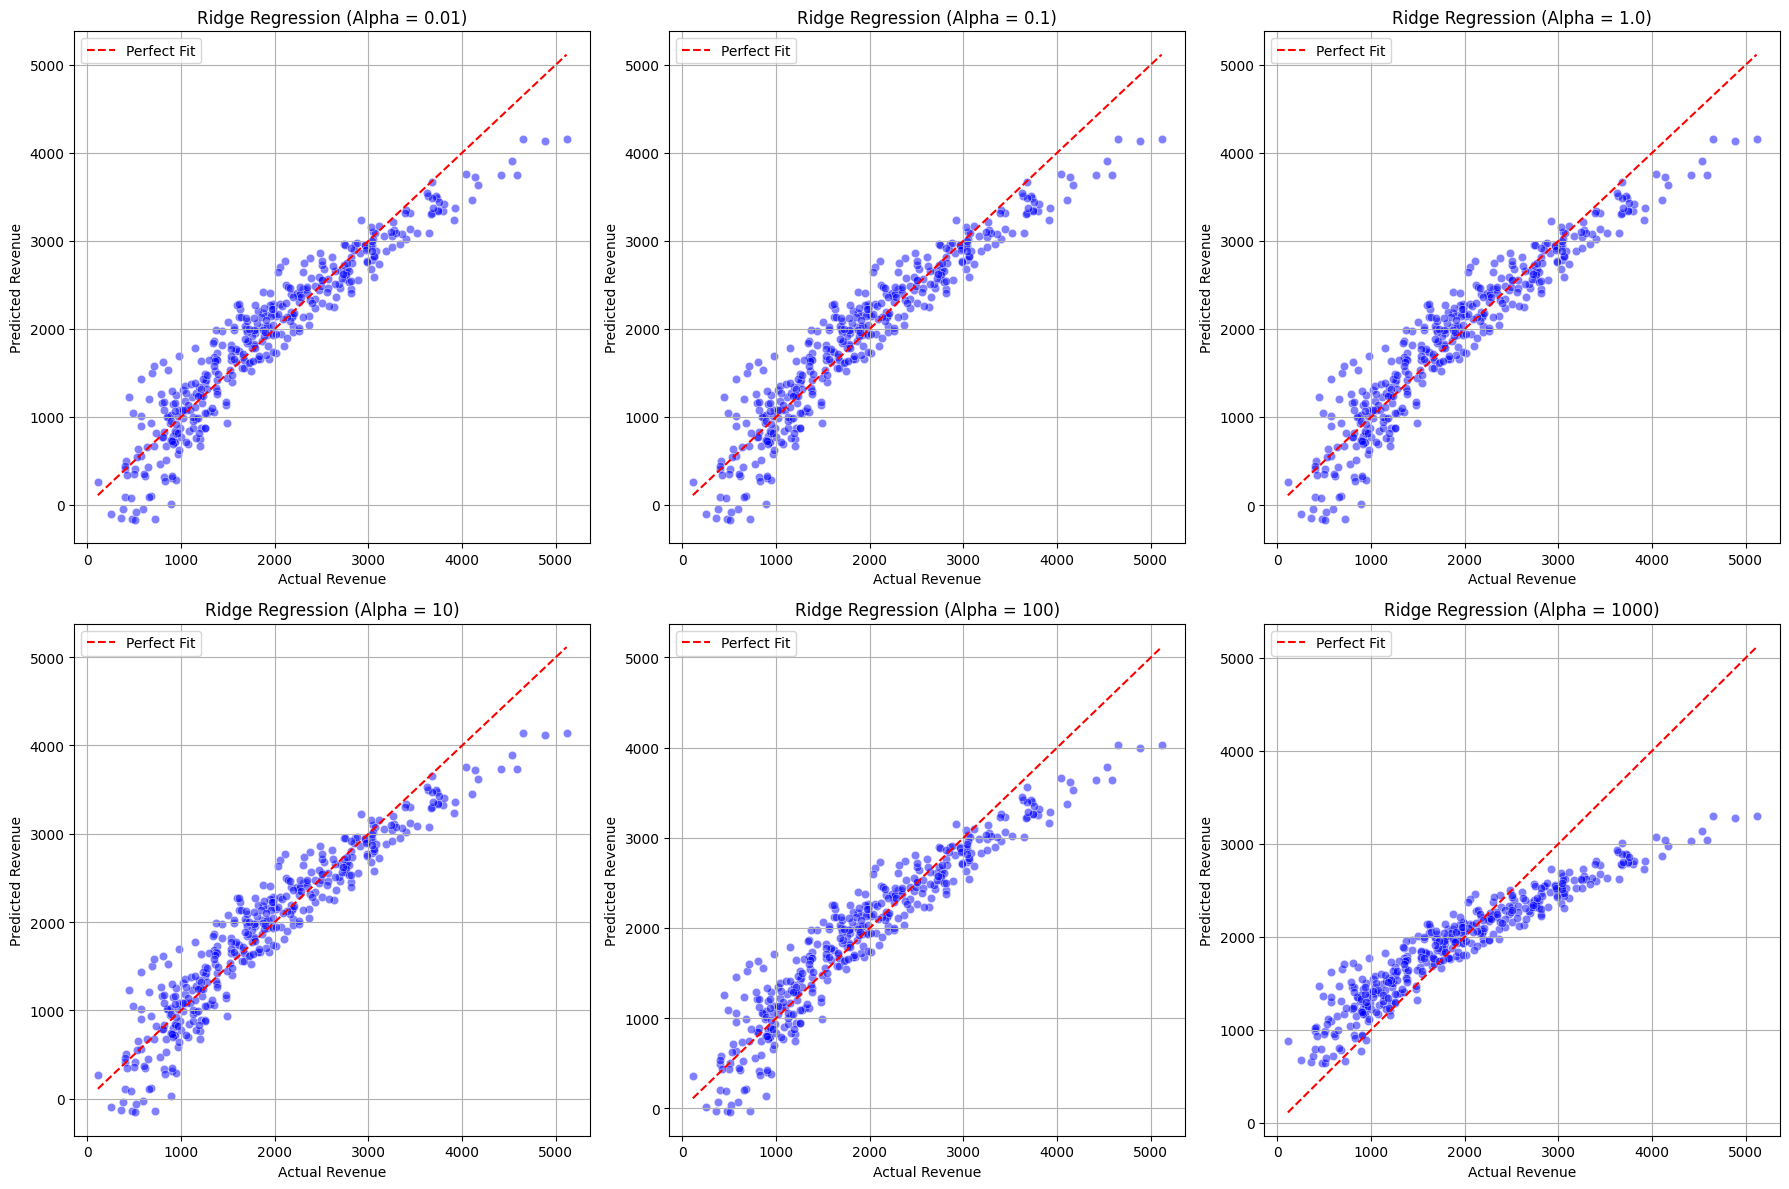

In [ ]:
### GRAPHS FOR RIDGE REGRESSION MODELS - generate scatter plots for actual vs. predicted revenue for different alpha values.

# Create subplots
plt.figure(figsize=(18, 12))

for i, alpha in enumerate(alpha_values, 1):  # enumerate(alpha_values, 1) assigns index i starting from 1 for subplot positioning
    ridge_model = Ridge(alpha=alpha) #Trains Ridge Regression using the current alpha value.
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test) #Generates predictions for revenue (y_pred) using the test dataset (X_test)

    # Create subplot for each alpha value 
    plt.subplot(2, 3, i) 
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue") #plots the actual revenue (y_test) vs. predicted revenue (y_pred). 
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Perfect Fit") # adds a red dashed line (y = x), which represents perfect predictions.
    plt.xlabel("Actual Revenue") #labels axes and title for each plot + legend + grid for better visualisation 
    plt.ylabel("Predicted Revenue")
    plt.title(f"Ridge Regression (Alpha = {alpha})")
    plt.legend()
    plt.grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Output: 
# Each scatter plot represents Ridge Regression predictions for a different alpha value.
# If points align closely with the red line, the model predicts revenue accurately.
# If alpha is too low (0.01-1.0), Ridge behaves like Linear Regression (potential overfitting).
# If alpha is too high (100-1000), the model may underfit (predictions shrink too much).


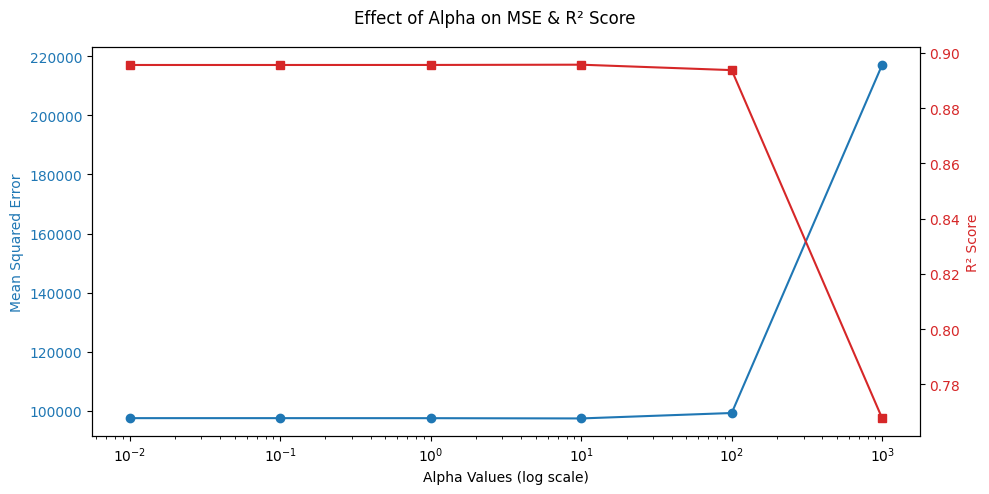

In [8]:
# HOW ALPHA AFFECTS MSE AND R^2

# Extract MSE & R² values
mse_scores = [ridge_results[alpha]['MSE'] for alpha in alpha_values]
r2_scores = [ridge_results[alpha]['R²'] for alpha in alpha_values]

# Plot MSE & R² vs. Alpha values
fig, ax1 = plt.subplots(figsize=(10, 5))

# MSE Plot
ax1.set_xlabel("Alpha Values (log scale)")
ax1.set_xscale("log")
ax1.set_ylabel("Mean Squared Error", color="tab:blue")
ax1.plot(alpha_values, mse_scores, marker='o', linestyle='-', color="tab:blue", label="MSE")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# R² Score Plot
ax2 = ax1.twinx()  # Create secondary y-axis
ax2.set_ylabel("R² Score", color="tab:red")
ax2.plot(alpha_values, r2_scores, marker='s', linestyle='-', color="tab:red", label="R² Score")
ax2.tick_params(axis="y", labelcolor="tab:red")

fig.suptitle("Effect of Alpha on MSE & R² Score")
fig.tight_layout()
plt.show()

